In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.drop(columns="Unnamed: 0", inplace=True)

In [6]:
df.duplicated().sum()

146

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df['x'] = np.where(df['x']==0, df['x'].mean(), df['x'])
df['y'] = np.where(df['y']==0, df['y'].mean(), df['y'])
df['z'] = np.where(df['z']==0, df['z'].mean(), df['z'])

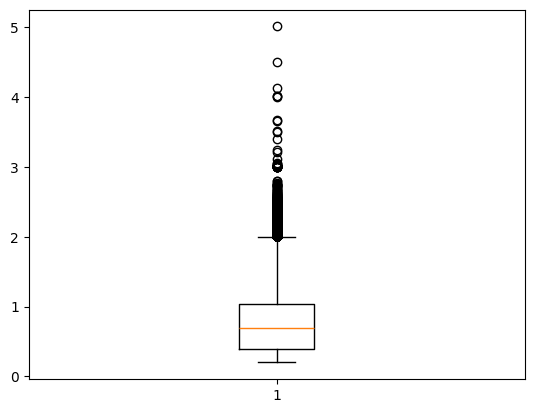

In [11]:
plt.boxplot(df['carat'])
plt.show()

In [12]:
df['carat'].value_counts()

carat
0.30    2596
1.01    2240
0.31    2238
0.70    1981
0.32    1827
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: count, Length: 273, dtype: int64

In [13]:
def calcu_lf_uf(q1, q3):
    IQR = q3-q1
    lf = q1-(1.5*IQR)
    uf = q3+(1.5*IQR)
    print("lf-->", lf, "uf-->", uf)
    return [lf, uf]

In [14]:
[lf, uf] = calcu_lf_uf(0.40000, 1.04000)

lf--> -0.5599999999999999 uf--> 2.0


In [15]:
# Removing the outliers from the carat columns

df['carat'] = np.where(df['carat']>uf, uf, df['carat'])
df['carat'] = np.where(df['carat']<lf, lf, df['carat'])

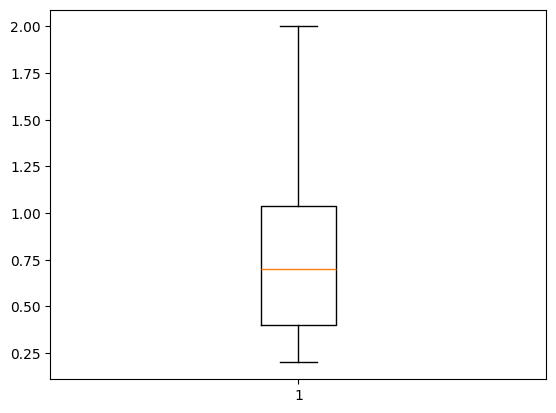

In [16]:
plt.boxplot(df['carat'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x283bf6eb790>,
 'caps': [<matplotlib.lines.Line2D at 0x283bf90ab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x283bf6e8390>],
 'medians': [<matplotlib.lines.Line2D at 0x283bf90b250>],
 'fliers': [<matplotlib.lines.Line2D at 0x283bf92b6d0>],
 'means': []}

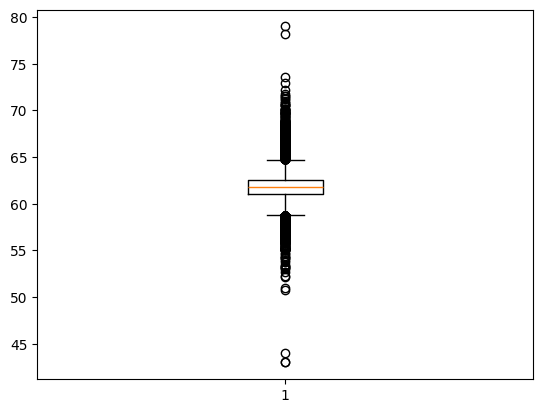

In [17]:
# depth column before

plt.boxplot(df['depth'])

In [18]:
# Removing the outliers from the depth

[lf, uf] = calcu_lf_uf(61.000000, 62.500000) 

lf--> 58.75 uf--> 64.75


In [19]:
df['depth'] = np.where(df['depth']>uf, uf, df['depth'])
df['depth'] = np.where(df['depth']<lf, lf, df['depth'])

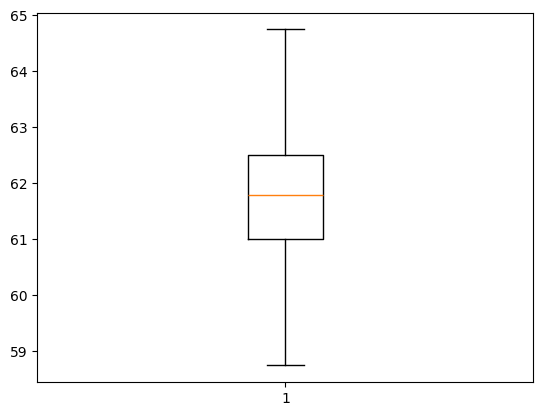

In [20]:
plt.boxplot(df['depth'])
plt.show()

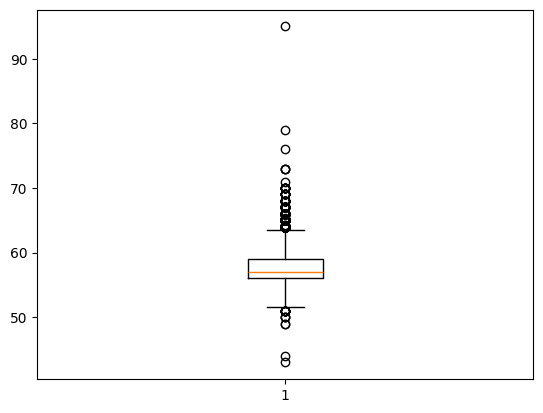

In [21]:
# Before removing outlier

plt.boxplot(df['table'])
plt.show()

In [22]:
[lf, uf] = calcu_lf_uf(56.000000, 	59.000000)

lf--> 51.5 uf--> 63.5


In [23]:
df['table'] = np.where(df['table']>uf, uf, df['table'])
df['table'] = np.where(df['table']<lf, lf, df['table'])

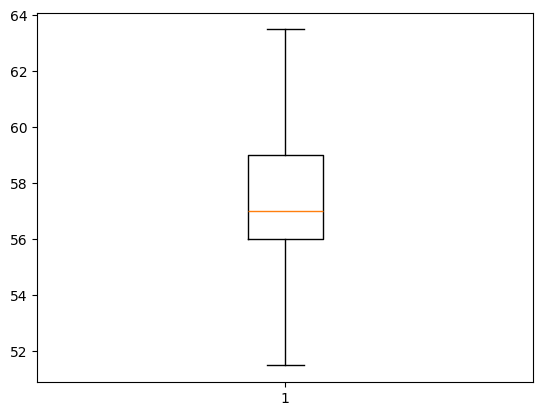

In [24]:
plt.boxplot(df['table'])
plt.show()

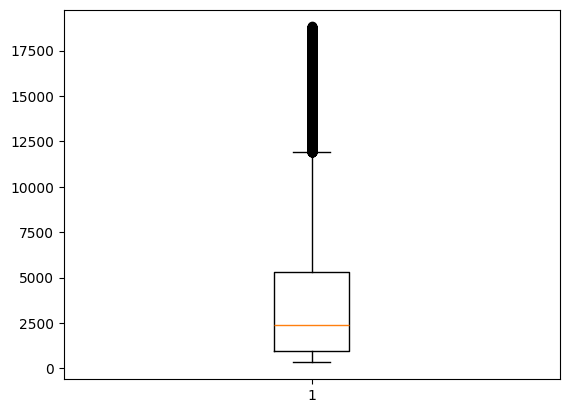

In [25]:
# Before removing the outliers 

plt.boxplot(df['price'])
plt.show()

In [26]:
# Removing the outliers from the column price

[lf, uf] = calcu_lf_uf(951.000000, 5326.750000)

lf--> -5612.625 uf--> 11890.375


In [27]:
df['price'] = np.where(df['price']>uf, uf, df['price'])
df['price'] = np.where(df['price']<lf, lf, df['price'])

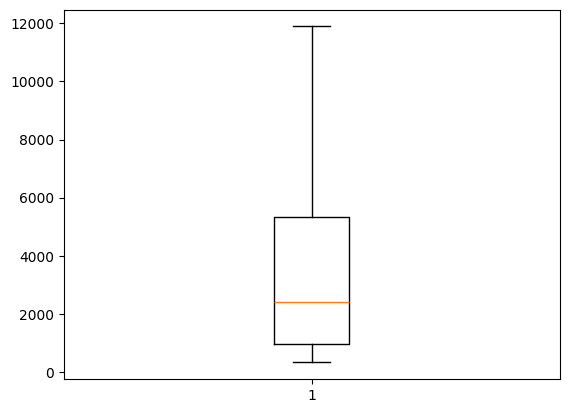

In [28]:
plt.boxplot(df['price'])
plt.show()

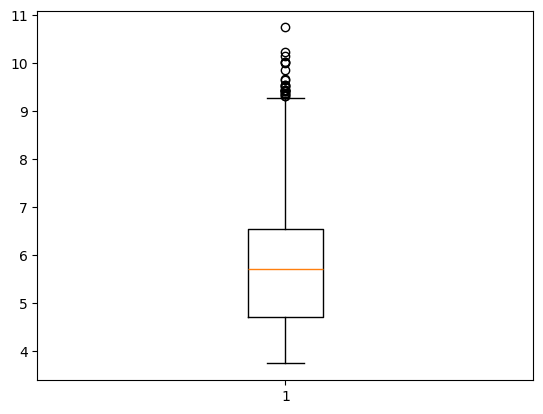

In [29]:
# Before removing the outliers 

plt.boxplot(df['x'])
plt.show()

In [30]:
# removing the outliers from the column x

[lf, uf] = calcu_lf_uf(4.710000, 6.540000)

lf--> 1.9649999999999999 uf--> 9.285


In [31]:
df['x'] = np.where(df['x']>uf, uf, df['x'])
df['x'] = np.where(df['x']<lf, lf, df['x'])

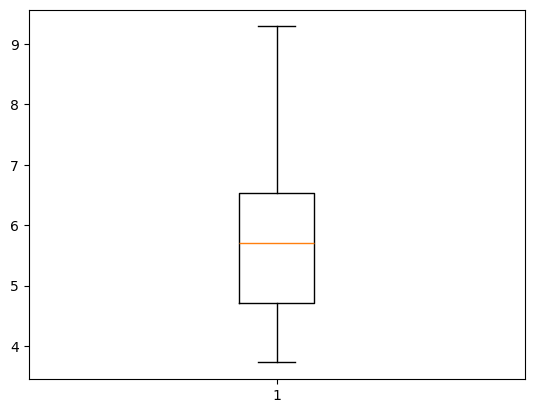

In [32]:
plt.boxplot(df['x'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x283bf7e2dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x283bf6d7650>,
 'boxes': [<matplotlib.lines.Line2D at 0x283bf7e1410>],
 'medians': [<matplotlib.lines.Line2D at 0x283bf6d5150>],
 'fliers': [<matplotlib.lines.Line2D at 0x283bf771810>],
 'means': []}

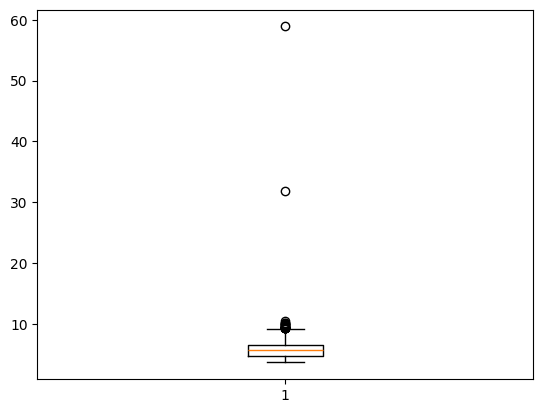

In [33]:
# Before removing the outlier 

plt.boxplot(df['y'])

In [34]:
[lf, uf] = calcu_lf_uf(4.720000, 6.540000) 

lf--> 1.9899999999999993 uf--> 9.27


In [35]:
df['y'] = np.where(df['y']>uf, uf, df['y'])
df['y'] = np.where(df['y']<lf, lf, df['y'])

In [36]:
df['z'] = np.where(df['z']>uf, uf, df['z'])
df['z'] = np.where(df['z']<lf, lf, df['z'])

{'whiskers': [<matplotlib.lines.Line2D at 0x283bfb05ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x283bfb07150>,
 'boxes': [<matplotlib.lines.Line2D at 0x283bfb04f10>],
 'medians': [<matplotlib.lines.Line2D at 0x283bfb106d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x283bfb11210>],
 'means': []}

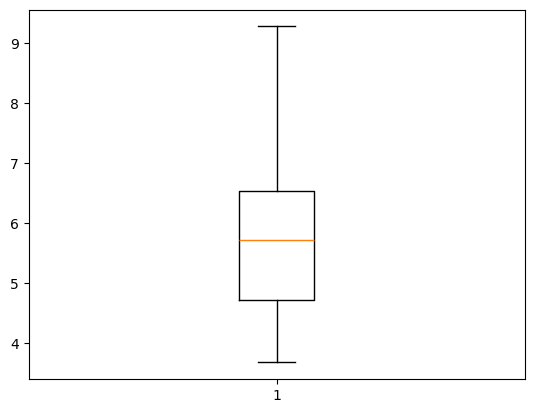

In [37]:
plt.boxplot(df['y'])

{'whiskers': [<matplotlib.lines.Line2D at 0x283bfb70a90>,
 'caps': [<matplotlib.lines.Line2D at 0x283bfb721d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x283bfb70150>],
 'medians': [<matplotlib.lines.Line2D at 0x283bfb73750>],
 'fliers': [<matplotlib.lines.Line2D at 0x283bfb781d0>],
 'means': []}

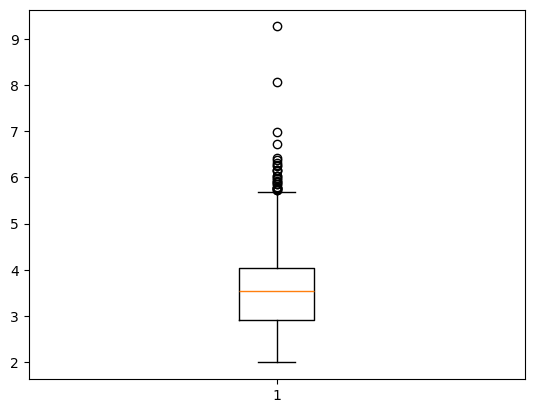

In [38]:
# before removing the outlier

plt.boxplot(df['z'])

In [39]:
# Removing the outliers from column z
[lf, uf] = calcu_lf_uf(2.910000, 4.030000) 

lf--> 1.23 uf--> 5.710000000000001


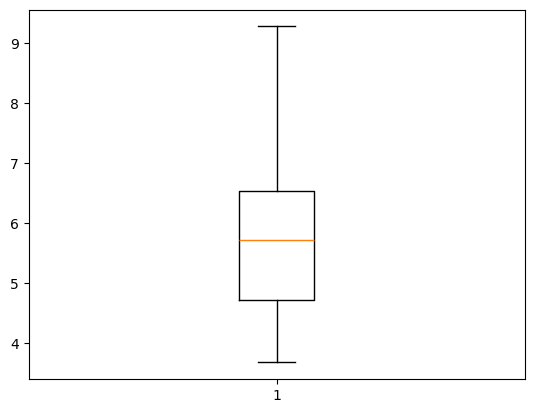

In [40]:
plt.boxplot(df['y'])
plt.show()

In [41]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [42]:
df.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.80,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.30,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.90,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,E,VS2,64.75,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.40,61.0,338.0,4.00,4.05,2.39


In [43]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.792471,61.748112,57.439612,3732.953436,5.731796,5.733815,3.539581
std,0.456694,1.269642,2.160989,3436.710718,1.118213,1.110370,0.691577
min,0.200000,58.750000,51.500000,326.000000,3.730000,3.680000,1.990000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,2.000000,64.750000,63.500000,11890.375000,9.285000,9.270000,9.270000


In [44]:
df.select_dtypes(object)

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [45]:
df1 = pd.get_dummies(df, columns=["cut"], drop_first=True)

df2 = pd.get_dummies(df1, columns=["color"], drop_first=True)

df3 = pd.get_dummies(df2, columns=["clarity"], drop_first=True)

In [46]:
df1.describe()

,carat,depth,table,price,x,y,z
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.792471,61.748112,57.439612,3732.953436,5.731796,5.733815,3.539581
std,0.456694,1.269642,2.160989,3436.710718,1.118213,1.110370,0.691577
min,0.200000,58.750000,51.500000,326.000000,3.730000,3.680000,1.990000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,2.000000,64.750000,63.500000,11890.375000,9.285000,9.270000,9.270000


In [47]:
df3.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.0,326.0,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.80,61.0,326.0,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,58.75,63.5,327.0,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.40,58.0,334.0,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.30,58.0,335.0,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [48]:
df3.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [49]:
x = df3[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']]
y = df3['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

x_test

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [50]:
model.score(x_train, y_train)

0.9404640564162208

In [51]:
model.score(x_test, y_test)

0.941803019472084

In [52]:
# df3['cut_Good'] = np.where(df3['cut_Good']==True, 1, 0)
# # df3['cut_Ideal'] = np.where(df3['cut_Ideal']==True, 1, 0)
# df3['cut_Good'] = np.where(df3['cut_Premium']==True, 1, 0)
# df3['cut_Good'] = np.where(df3['cut_Good']==True, 1, 0)
# df3['cut_Good'] = np.where(df3['cut_Good']==True, 1, 0)
# df3['cut_Good'] = np.where(df3['cut_Good']==True, 1, 0)
# df3['cut_Good'] = np.where(df3['cut_Good']==True, 1, 0)